# KAN using pykan
taken from [here](https://kindxiaoming.github.io/pykan/intro.html)

In [1]:
%run ../supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



The imports

In [1]:
from kan import *


create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).

In [ ]:

model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

create dataset f(x,y) = exp(sin(pi*x)+y^2)

In [ ]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

plot KAN at initialization


In [ ]:
model(dataset['train_input'])
model.plot(beta=100)

train the model


In [ ]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

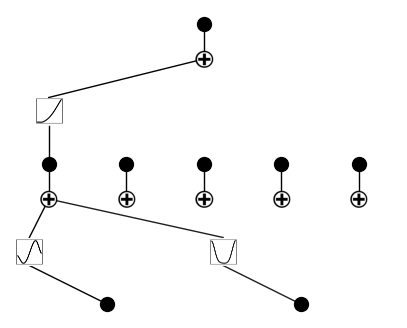

In [5]:
model.plot()

saving model version 0.2


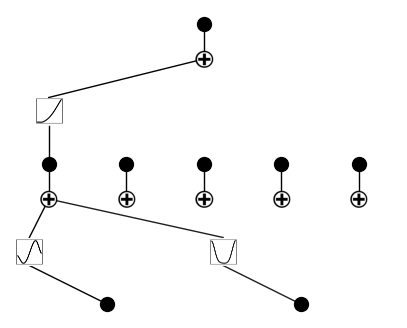

In [6]:
model.prune()
model.plot()

saving model version 0.2


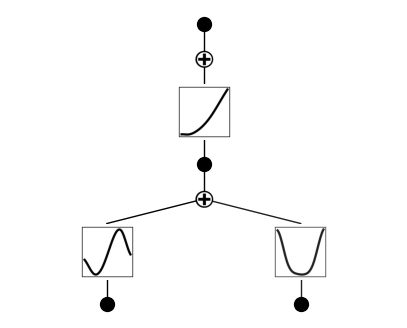

In [7]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [8]:
model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 7.30e-03 | test_loss: 7.24e-03 | reg: 7.60e+00 | : 100%|█| 50/50 [00:03<00:00, 12.97it

saving model version 0.3


{'train_loss': [array(0.12952511, dtype=float32),
  array(0.05934893, dtype=float32),
  array(0.03499892, dtype=float32),
  array(0.01925761, dtype=float32),
  array(0.01464661, dtype=float32),
  array(0.01289113, dtype=float32),
  array(0.01030145, dtype=float32),
  array(0.00868717, dtype=float32),
  array(0.00793991, dtype=float32),
  array(0.00749116, dtype=float32),
  array(0.00736409, dtype=float32),
  array(0.00731061, dtype=float32),
  array(0.00730655, dtype=float32),
  array(0.0073044, dtype=float32),
  array(0.00730377, dtype=float32),
  array(0.00730469, dtype=float32),
  array(0.00730455, dtype=float32),
  array(0.00730455, dtype=float32),
  array(0.00730455, dtype=float32),
  array(0.00730455, dtype=float32),
  array(0.00730458, dtype=float32),
  array(0.00730439, dtype=float32),
  array(0.00730439, dtype=float32),
  array(0.00730439, dtype=float32),
  array(0.00730439, dtype=float32),
  array(0.00730444, dtype=float32),
  array(0.00730444, dtype=float32),
  array(0.00730

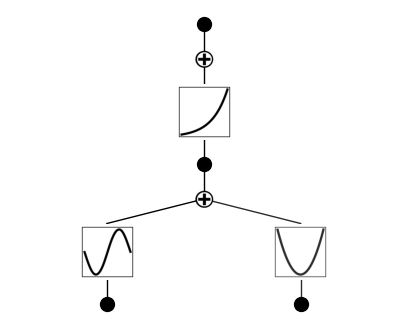

In [9]:
model.plot()

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999731183052063, c=2
fixing (0,1,0) with x^2, r2=0.9999991059303284, c=2
fixing (1,0,0) with exp, r2=0.9999991655349731, c=2
saving model version 0.4


In [11]:
model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 8.98e-04 | test_loss: 8.91e-04 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 25.31it

saving model version 0.5


{'train_loss': [array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.00089762, dtype=float32),
  array(0.0008

In [12]:
model.symbolic_formula()[0][0]

0.997282637072315*exp(1.00103641851225*(8.012980339873e-5 - x_2)**2 + 1.00172945921998*sin(3.14217782020569*x_1 - 0.000247403018875048)) + 0.00297119747847319